In [296]:
# For reference   

 # info_dict = {
    #     "game_id": unique_game_id,
    #     "transcript": game_state,
    #     "result": result,
    #     "player_one": player_one_title,
    #     "player_two": player_two_title,
    #     "player_one_score": player_one_score,
    #     "player_two_score": player_two_score,
    #     "player_one_illegal_moves": player_one_illegal_moves,
    #     "player_two_illegal_moves": player_two_illegal_moves,
    #     "player_one_resignation": player_one_resignation,
    #     "player_two_resignation": player_two_resignation,
    #     "game_title": f"{player_one_title} vs. {player_two_title}",
    #     "number_of_moves": board.fullmove_number,
    #     "time_taken": total_time,
    # }

[1.  0.  nan 0.5]
game_title
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 0     0.333333
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 1     0.206186
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 10    0.000000
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 2     0.173684
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 3     0.075269
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 4     0.059140
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 5     0.025773
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 6     0.010204
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 7     0.000000
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 8     0.005102
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 9     0.010000
Name: player_one_score, dtype: float64


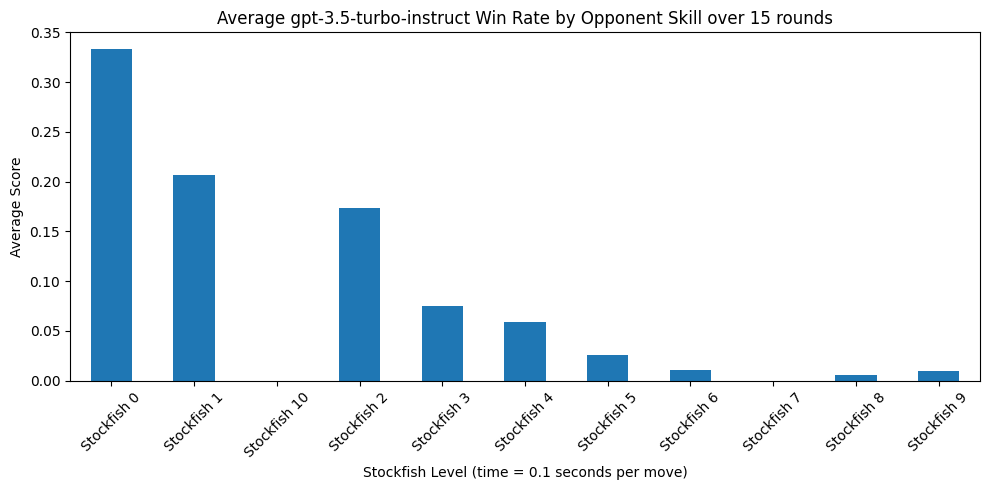

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_player_gpt_score(player: str, df: pd.DataFrame) -> None:
    if player != "player_one" and player != "player_two":
        raise ValueError("player must be either 'player_one' or 'player_two'")
    
    # Convert the player_one_score column to numeric type (if it's not already)
    df[f"{player}_score"] = pd.to_numeric(df[f"{player}_score"], errors="coerce")
    print(df[f"{player}_score"].unique())

    # Compute average score of player_one grouped by game_title
    average_scores = df.groupby("game_title")[f"{player}_score"].mean()

    # Display the result
    print(average_scores)

    average_scores.index = average_scores.index.str.split(' vs. ').str[1].str.strip()

    average_scores.plot(kind="bar", figsize=(10, 5))
    plt.title(f"Average gpt-3.5-turbo-instruct Win Rate by Opponent Skill over 15 rounds")
    plt.ylabel("Average Score")
    plt.xlabel("Stockfish Level (time = 0.1 seconds per move)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.show()
    plt.savefig("gpt-3.5-turbo-instruct-win-rate.png")

filename = "logs/ckpt_16_pt_vs_stockfish_sweep.csv"
filename = "logs/ckpt_8_pt_vs_stockfish_sweep.csv"
# filename = "logs/2325_lichess_ckpt_pt_vs_stockfish_sweep.csv"
# filename = "logs/ckpt_synthetic_split_no_opt_pt_vs_stockfish_sweep.csv"
filename = "logs/lichess_16_ckpt_pt_vs_stockfish_sweep.csv"
filename = "logs/lichess_8layers_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv"
filename = "logs/lichess_stockfish_mix_8layers_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv"
filename = "logs/lichess_8layers_results_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv"
df = pd.read_csv(filename)

graph_player_gpt_score("player_one", df)


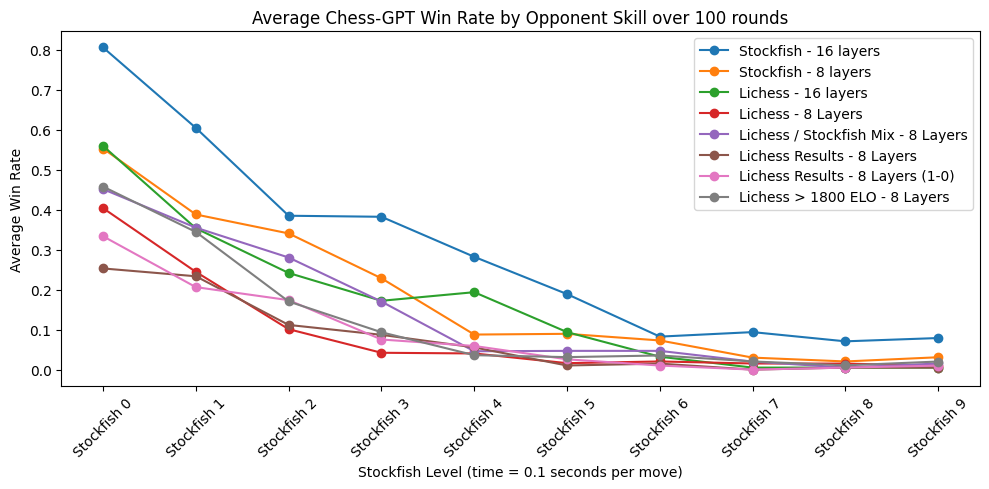

In [306]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_player_gpt_scores(player: str, dfs: list[pd.DataFrame], labels: list[str]) -> None:
    if player != "player_one" and player != "player_two":
        raise ValueError("player must be either 'player_one' or 'player_two'")
    
    avg_scores_list = []

    for df in dfs:
        
        # Convert the player_score column to numeric type (if it's not already)
        df[f"{player}_score"] = pd.to_numeric(df[f"{player}_score"], errors="coerce")

        # Compute average score of player grouped by game_title
        avg_scores = df.groupby("game_title")[f"{player}_score"].mean()
        avg_scores_list.append(avg_scores)

    # Plotting
    plt.figure(figsize=(10, 5))
    # for i, avg_scores in enumerate(avg_scores_list):
    #     avg_scores.index = avg_scores.index.str.split(' vs. ').str[1].str.strip()
    #     avg_scores.plot(kind="bar", position=i, label=labels[i])

    for df, label in zip(dfs, labels):
        df = df[df['player_two'] != 'Stockfish 10'].copy()
        # Convert the player_score column to numeric type (if it's not already)
        df[f"{player}_score"] = pd.to_numeric(df[f"{player}_score"], errors="coerce")

        # Compute average score of player grouped by game_title
        avg_scores = df.groupby("game_title")[f"{player}_score"].mean()

        # Clean up the index for better labeling
        avg_scores.index = avg_scores.index.str.split(' vs. ').str[1].str.strip()

        # Plotting
        plt.plot(avg_scores, label=label, marker='o')  # Line chart with markers


    plt.title(f"Average Chess-GPT Win Rate by Opponent Skill over 100 rounds")
    plt.ylabel("Average Win Rate")
    plt.xlabel("Stockfish Level (time = 0.1 seconds per move)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig("llm-win-rate.png")
    # plt.show()  # Uncomment this if you want to display the plot

# Example usage
filenames = [
"logs/ckpt_16_pt_vs_stockfish_sweep.csv",
"logs/ckpt_8_pt_vs_stockfish_sweep.csv",
# "logs/ckpt_synthetic_split_no_opt_pt_vs_stockfish_sweep.csv",
"logs/lichess_16_ckpt_pt_vs_stockfish_sweep.csv",
"logs/lichess_8layers_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv",
"logs/lichess_stockfish_mix_8layers_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv",
"logs/lichess_8layers_results_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv",
"logs/lichess_8layers_results_ckpt_no_optimizer_pt_vs_stockfish_sweep_1-0.csv",
"logs/lichess_8layers_gt_18k_ckpt_no_optimizer_pt_vs_stockfish_sweep.csv"
]

dfs = [pd.read_csv(filename) for filename in filenames]
labels = ["Stockfish - 16 layers",
        "Stockfish - 8 layers",
        "Lichess - 16 layers",
        "Lichess - 8 Layers",
         "Lichess / Stockfish Mix - 8 Layers",
         "Lichess Results - 8 Layers",
         "Lichess Results - 8 Layers (1-0)",
         "Lichess > 1800 ELO - 8 Layers"]

graph_player_gpt_scores("player_one", dfs, labels)


C:\Users\adamk\AppData\Local\Temp\ipykernel_43116\2759894042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{player}_result"] = df[f"{player}_score"].apply(categorize)


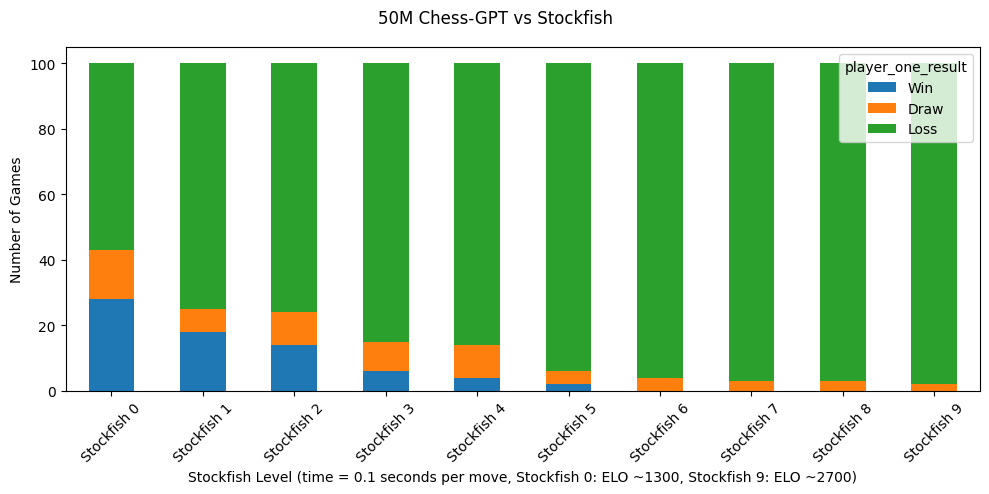

In [299]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_player_gpt_score(player: str, df: pd.DataFrame) -> None:
    if player not in ["player_one", "player_two"]:
        raise ValueError("player must be either 'player_one' or 'player_two'")
    
    # Convert the score column to numeric type (if it's not already)
    df[f"{player}_score"] = pd.to_numeric(df[f"{player}_score"], errors="coerce")

    # Categorize each game result into win, loss, or draw
    def categorize(score):
        if score == 1:
            return 'Win'
        elif score == 0:
            return 'Loss'
        else:
            return 'Draw'
        
    df = df[df['player_two'] != 'Stockfish 10']

    df[f"{player}_result"] = df[f"{player}_score"].apply(categorize)

    # Group by game title and result type, then count occurrences
    result_counts = df.groupby(["player_two", f"{player}_result"]).size().unstack().fillna(0)
    result_counts = result_counts[['Win', 'Draw', 'Loss']]

    # Create a stacked bar chart
    result_counts.plot(kind="bar", stacked=True, figsize=(10, 5))

    plt.suptitle(f"50M Chess-GPT vs Stockfish")
    # plt.title("Stockfish 0: ELO ~1300, Stockfish 9: ELO ~2700")
    plt.ylabel("Number of Games")
    plt.xlabel("Stockfish Level (time = 0.1 seconds per move, Stockfish 0: ELO ~1300, Stockfish 9: ELO ~2700)")
    # plt.text(0.5, -0.4, "Stockfish 0: ELO ~1300, Stockfish 9: ELO ~2700", ha='center', va='center', transform=plt.gca().transAxes)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"50M-Chess-GPT-win-rate.png")

# Example usage
graph_player_gpt_score("player_one", df)


In [300]:
import pandas as pd
def analyze_move_history(df: pd.DataFrame, model: str, player: str) -> None:
    if player != "player_one" and player != "player_two":
        raise ValueError("player must be either 'player_one' or 'player_two'")
    
    model = df[player].unique()[0]

    # Filter the DataFrame for games where player title is model
    filtered_df = df[df[player] == model]

    # Compute total illegal moves and total moves
    total_illegal_moves = filtered_df[f"{player}_illegal_moves"].sum()
    total_legal_moves = filtered_df[f"{player}_legal_moves"].sum()
    total_moves = filtered_df['total_moves'].sum()

    print(f"\n{model} Stats\n")

    # Calculate the ratio
    ratio = total_illegal_moves / total_moves
    print(f"total moves: {total_moves}, total illegal moves: {total_illegal_moves}")
    print(f"total legal moves: {total_legal_moves}")
    # Display the result
    print(f"Ratio of Player One's Illegal Moves to Total Moves: {ratio:.4f}")
    print(f"Ratio of Player One's Legal Moves to Total Moves: {(total_legal_moves / total_moves):.4f}")

    # Other stats
    min_moves = filtered_df['number_of_moves'].min()
    max_moves = filtered_df['number_of_moves'].max()
    median_moves = filtered_df['number_of_moves'].median()
    std_dev_moves = filtered_df['number_of_moves'].std()

    
    print(f"Minimum Moves: {min_moves}")
    print(f"Maximum Moves: {max_moves}")
    print(f"Median Moves: {median_moves}")
    print(f"Standard Deviation of Moves: {std_dev_moves:.2f}")

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

analyze_move_history(df, "gpt-3.5-turbo-instruct", "player_one")
analyze_move_history(df, "gpt-4", "player_one")
analyze_move_history(df, "gpt-3.5-turbo", "player_one")
analyze_move_history(df, "babbage", "player_one")
analyze_move_history(df, "davinci", "player_one")
analyze_move_history(df, "replicate/meta/llama-2-7b:527827021d8756c7ab79fde0abbfaac885c37a3ed5fe23c7465093f0878d55ef", "player_one")
analyze_move_history(df, "replicate/meta/llama-2-70b:a52e56fee2269a78c9279800ec88898cecb6c8f1df22a6483132bea266648f00", "player_one")


lichess_8layers_results_ckpt_no_optimizer.pt Stats

total moves: 48967, total illegal moves: 1143
total legal moves: 48655
Ratio of Player One's Illegal Moves to Total Moves: 0.0233
Ratio of Player One's Legal Moves to Total Moves: 0.9936
Minimum Moves: 12
Maximum Moves: 91
Median Moves: 43.0
Standard Deviation of Moves: 17.48

lichess_8layers_results_ckpt_no_optimizer.pt Stats

total moves: 48967, total illegal moves: 1143
total legal moves: 48655
Ratio of Player One's Illegal Moves to Total Moves: 0.0233
Ratio of Player One's Legal Moves to Total Moves: 0.9936
Minimum Moves: 12
Maximum Moves: 91
Median Moves: 43.0
Standard Deviation of Moves: 17.48

lichess_8layers_results_ckpt_no_optimizer.pt Stats

total moves: 48967, total illegal moves: 1143
total legal moves: 48655
Ratio of Player One's Illegal Moves to Total Moves: 0.0233
Ratio of Player One's Legal Moves to Total Moves: 0.9936
Minimum Moves: 12
Maximum Moves: 91
Median Moves: 43.0
Standard Deviation of Moves: 17.48

lichess_8

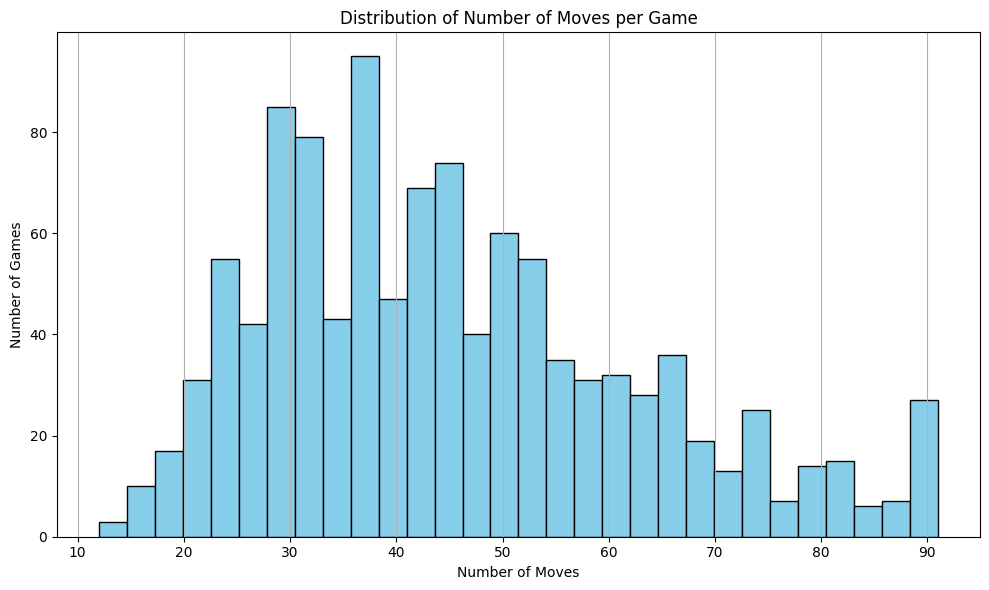

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Histogram for distribution of number of moves per game
plt.figure(figsize=(10,6))
df['number_of_moves'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Number of Moves per Game')
plt.xlabel('Number of Moves')
plt.ylabel('Number of Games')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [302]:
# Group by player_two_title and count the occurrences
title_counts = df.groupby('game_title').size()

print(title_counts)

# Filter titles with a count less than 30
# titles_less_than_30 = title_counts[title_counts < 30]

# # Display the result
# print(titles_less_than_30)

game_title
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 0     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 1     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 10    100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 2     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 3     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 4     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 5     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 6     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 7     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 8     100
lichess_8layers_results_ckpt_no_optimizer.pt vs. Stockfish 9     100
dtype: int64


In [303]:
df = pd.read_csv("logs/games.csv")
filtered_game = df[
    (df['player_one'] == "gpt-3.5-turbo-instruct") &
    (df['player_two'] == "Stockfish 9") & 
    (df['player_one_score'] != "0")
]

print(filtered_game)

             game_id                                         transcript  \
136  1695413352-1107  [Event "FIDE World Championship Match 2024"]\n...   
146  1695413660-1489  [Event "FIDE World Championship Match 2024"]\n...   

      result              player_one   player_two player_one_score  \
136  1/2-1/2  gpt-3.5-turbo-instruct  Stockfish 9              1/2   
146      1-0  gpt-3.5-turbo-instruct  Stockfish 9                1   

    player_two_score  player_one_illegal_moves  player_two_illegal_moves  \
136              1/2                         0                         0   
146                0                         0                         0   

     player_one_resignation  player_two_resignation  \
136                   False                   False   
146                   False                   False   

     player_one_failed_to_find_legal_move  \
136                                 False   
146                                 False   

     player_two_failed_to_find_l

In [304]:
df = pd.read_csv("logs/games.csv")
filtered_game = df[
    (df['player_one'] == "gpt-3.5-turbo-instruct") &
    (df['player_one_illegal_moves'] > 0)
]

print(filtered_game)

             game_id                                         transcript  \
0    1695410287-2414  [Event "FIDE World Championship Match 2024"]\n...   
77   1695411920-1540  [Event "FIDE World Championship Match 2024"]\n...   
130  1695413213-5860  [Event "FIDE World Championship Match 2024"]\n...   
133  1695413269-1742  [Event "FIDE World Championship Match 2024"]\n...   

    result              player_one   player_two player_one_score  \
0      1-0  gpt-3.5-turbo-instruct  Stockfish 0                1   
77     0-1  gpt-3.5-turbo-instruct  Stockfish 5                0   
130    0-1  gpt-3.5-turbo-instruct  Stockfish 8                0   
133    0-1  gpt-3.5-turbo-instruct  Stockfish 8                0   

    player_two_score  player_one_illegal_moves  player_two_illegal_moves  \
0                  0                        10                         0   
77                 1                         4                         0   
130                1                        10         